In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Question 1

In [3]:
# image path
image_path = 'images/Maple.jpg'

# read image
img = cv.imread(image_path)

# Check if the image was successfully loaded
if img is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


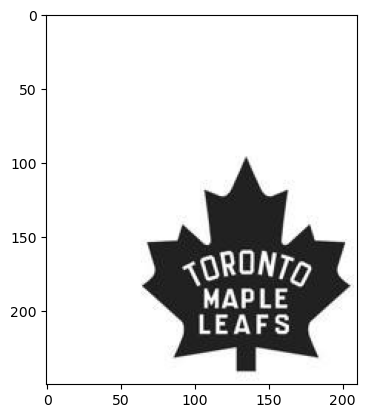

In [4]:
# Display the image

# Convert the image from BGR to RGB color space
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
# plt.axis('off')  # Hide the axis
plt.show()

In [24]:
theta1 = np.deg2rad(30)
theta2 = np.radians(30)
print(theta1, theta2)

0.5235987755982988 0.5235987755982988


In [33]:
# Define transformation matrices
def get_transformation_matrices(x,y,angle):
    # self.x=x
    # self.y=y
    # T1: Translation 1
    T1 = np.array([
        [1, 0, -x],
        [0, 1, -y],
        [0, 0, 1]
    ])
    
    # T2: Rotation 30 degrees clockwise
    theta = np.deg2rad(angle) # Clockwise rotation is negative in OpenCV
    T2 = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    
    # T3: Translation 2
    T3 = np.array([
        [1, 0, x],
        [0, 1, y],
        [0, 0, 1]
    ])
    
    # Final transformation matrix T = T3 * T2 * T1
    T_final = T3.dot(T2.dot(T1))
    
    return T1, T2, T3, T_final



def Geometric_Transform(img, T):
    """
    geometric transformation to an image using 1st order interpolation
    Args:
        img: Input image
        T: 3x3 transformation matrix
    Returns:
        output_image: Transformed image with same size and white background
    """
    # Get input image size
    height, width = img.shape[:2]   # I get the image dimensions
    
    # Create output image with white background
    output_image = np.full_like(img, 255)
    
    # Get inverse transformation matrix
    T_inv = np.linalg.inv(T)
    
    # Loop through each pixel in the output image
    for y in range(height):
        for x in range(width):
            # Convert to homogeneous coordinates
            p = np.array([x, y, 1])  # Each point (x,y) is converted to homogeneous coordinates [x, y, 1] 
                                     # to allow us to represent both rotation and translation in a single matrix multiplication
            
            # Apply inverse transformation
            p_orig = T_inv.dot(p)
            
            # Convert back to image coordinates
            x_orig = p_orig[0] / p_orig[2]
            y_orig = p_orig[1] / p_orig[2]
            
            # Check if the point is within image bounds
            if 0 <= x_orig < width-1 and 0 <= y_orig < height-1:
                # Bilinear interpolation
                x0, y0 = int(x_orig), int(y_orig)
                x1, y1 = x0 + 1, y0 + 1
                
                # Calculate interpolation weights
                wx = x_orig - x0
                wy = y_orig - y0
                
                # Get pixel values at neighboring points
                p00 = img[y0, x0]
                p01 = img[y0, x1]
                p10 = img[y1, x0]
                p11 = img[y1, x1]
                
                # Interpolate
                pixel = (1-wx)*(1-wy)*p00 + wx*(1-wy)*p01 + (1-wx)*wy*p10 + wx*wy*p11
                output_image[y, x] = pixel.astype(np.uint8)
    
    return output_image

mat T1: 
 [[   1    0 -135]
 [   0    1 -175]
 [   0    0    1]] 
 and shape: (3, 3)
mat T2: 
 [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]] 
 and shape: (3, 3)
mat T3: 
 [[  1   0 135]
 [  0   1 175]
 [  0   0   1]] 
 and shape: (3, 3)
mat T_final: 
 [[  0.8660254   -0.5        105.58657049]
 [  0.5          0.8660254  -44.05444566]
 [  0.           0.           1.        ]] 
 and shape: (3, 3)
Original Image


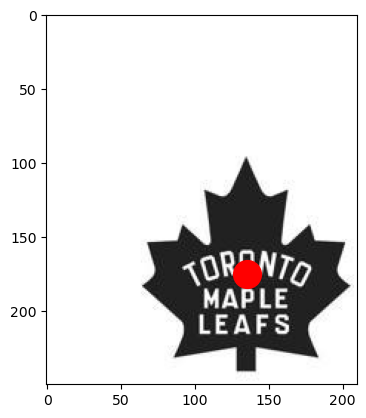

Transformed Image


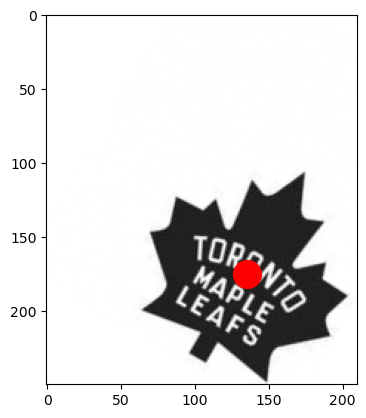

In [34]:
%reload_ext autoreload
x=135
y=175
angle=30
# Get transformation matrices
T1, T2, T3, T_final = get_transformation_matrices(x=x, y=y,angle=angle)
print(f"mat T1: \n {T1} \n and shape: {T1.shape}")
print(f"mat T2: \n {T2} \n and shape: {T2.shape}")
print(f"mat T3: \n {T3} \n and shape: {T3.shape}")
print(f"mat T_final: \n {T_final} \n and shape: {T_final.shape}")

# Apply transformation
transformed_img = Geometric_Transform(img, T_final)

# Display results
print("Original Image")
plt.imshow(img_rgb)
plt.plot(x, y, 'ro', markersize=20)
plt.show()

print("Transformed Image")
plt.imshow(transformed_img)
plt.plot(x, y, 'ro', markersize=20)
plt.show()